<a href="https://colab.research.google.com/github/yash112343/yaswanth/blob/main/Phishing_Websites_Dataset_%E2%80%93_URL_based_phishing_classification1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Loaded!
                                                 url  length_url  \
0              http://www.crestonwood.com/router.php          37   
1  http://shadetreetechnology.com/V4/validation/a...          77   
2  https://support-appleld.com.secureupdate.duila...         126   
3                                 http://rgipt.ac.in          18   
4  http://www.iracing.com/tracks/gateway-motorspo...          55   

   length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  nb_or  ...  \
0               19   0        3           0      0      0       0      0  ...   
1               23   1        1           0      0      0       0      0  ...   
2               50   1        4           1      0      1       2      0  ...   
3               11   0        2           0      0      0       0      0  ...   
4               15   0        2           2      0      0       0      0  ...   

   domain_in_title  domain_with_copyright  whois_registered_domain  \
0                0

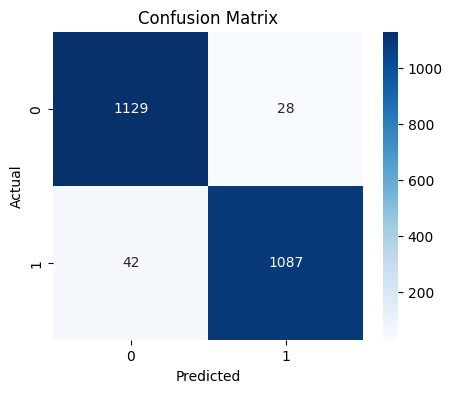

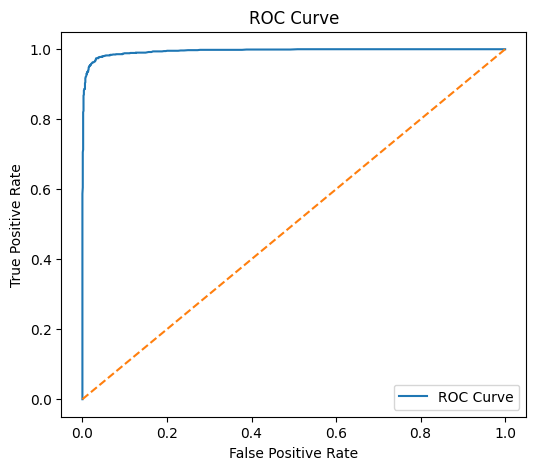


===== SAMPLE PREDICTION =====
Prediction: legitimate
Probability (Legitimate): 0.49666666666666665


In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    roc_auc_score, confusion_matrix, roc_curve
)


df = pd.read_csv("/content/drive/MyDrive/dataset_phishing.csv.zip")

print("Dataset Loaded!")
print(df.head())

X = df.drop(["status", "url"], axis=1)
y = df["status"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


model = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42
)

model.fit(X_train, y_train)

print("\nModel Training Completed!")


y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("\n============= MODEL PERFORMANCE ============")
print("Accuracy   :", accuracy_score(y_test, y_pred))
print("Precision  :", precision_score(y_test, y_pred, pos_label='phishing'))
print("Recall     :", recall_score(y_test, y_pred, pos_label='phishing'))
print("ROC-AUC    :", roc_auc_score(y_test, y_prob))
print("==============================================\n")


import seaborn as sns
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label='phishing')

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0,1], [0,1], "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


sample = X.iloc[0:1]
sample_pred = model.predict(sample)[0]
sample_prob = model.predict_proba(sample)[0][1]

print("\n===== SAMPLE PREDICTION =====")
print("Prediction:", sample_pred)
print("Probability (Legitimate):", sample_prob)
